<a href="https://colab.research.google.com/github/camelliatea/dicoding-proyek-machine-learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Elita_Camellia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan: **Beverage Sales**

Sumber: [beverage-sales](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)

Dataset ini menampilkan transaksi B2B dan B2C yang mensimulasikan pola penjualan dalam industri minuman dengan menyoroti beberapa faktor penting, seperte preferensi regional, fluktuasi musiman, dan segmentasi pelanggan. Dataset ini mencatat 3.000.000, tetapi hanya 5000 transaksi yang akan digunakan.

Berikut deskripsi dari setiap kolom:
- Order_ID: Identifikasi unik untuk setiap pesanan.
- Customer_ID: Identifikasi unik untuk setiap pelanggan.
- Customer_Type: Identifikasi jenis pelanggan, apakah B2B atau B2C.
- Product: Nama produk yang dibeli.
- Category: Kategori dari produk.
- Unit_Price: Harga satuan (per unit) produk.
- Quantity: Jumlah unit produk yang dibeli.
- Discount: Diskon yang diterapkan pada produk, hanya diberikan kepada pelanggan B2B.
- Total_Price: Total harga produk setelah menerapkan diskon.
- Region: Wilayah pelanggan.
- Order_Date: Tanggal saat pesanan dilakukan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # menghubungkan gdrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data/Dataset_inisiasi.csv', parse_dates=['Order_Date'])
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Memahami Struktur Data**

In [ ]:
# Menampilkan informasi umum dari dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       25000 non-null  object        
 1   Customer_ID    25000 non-null  object        
 2   Customer_Type  25000 non-null  object        
 3   Product        25000 non-null  object        
 4   Category       25000 non-null  object        
 5   Unit_Price     25000 non-null  float64       
 6   Quantity       25000 non-null  int64         
 7   Discount       25000 non-null  float64       
 8   Total_Price    25000 non-null  float64       
 9   Region         25000 non-null  object        
 10  Order_Date     25000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 2.1+ MB


(25000, 11)

Insight:
- Dataset terdiri atas 25000 baris dan 11 kolom.
- Tipe data setiap kolom terdiri atas float64, int64, dan object.
- Tipe data untuk Order_Date seharusnya adalah datetime64 sehingga diperlukan perubahan tipe data.

**Mengidentifikasi Data Hilang**

In [ ]:
# Menampilkan missing values
df.isna().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


Insight: Dataset bersih tanpa adanya data yang hilang.

**Menganalisis Distribusi Variabel Numerik**

In [ ]:
# Melihat statistik deskriptif untuk fitur numerik, termasuk Order_Date
df.describe()

,Unit_Price,Quantity,Discount,Total_Price,Order_Date
count,25000.000000,25000.000000,25000.000000,25000.000000,25000
mean,5.740826,23.376920,0.030132,130.882189,2022-07-07 21:21:11.808000
min,0.320000,1.000000,0.000000,0.380000,2021-01-01 00:00:00
25%,1.070000,6.000000,0.000000,8.540000,2021-10-10 00:00:00
50%,1.750000,11.000000,0.000000,21.160000,2022-07-12 00:00:00
75%,3.190000,32.000000,0.050000,69.220000,2023-04-08 00:00:00
max,137.360000,100.000000,0.150000,11325.330000,2023-12-30 00:00:00
std,14.702760,27.042759,0.045084,512.600216,NaN


Insight:
- Berdasarkan Unit_Price, harga satuan produk bervariasi dari 0.32 hingga 137.36, dengan rata-rata 5.74.
- Berdasarkan Quantity, jumlah unit produk yang dibeli pelanggan bervariasi mulai dari 1 hingga 100, dengan rata-rata 23.3769.
- Berdasarkan Discount, diskon pada setiap produk diterapkan dalam interval tetap sebesar 0.05, mulai dari 0.00, 0.05, 0.10, dan 0.15, dengan rata-rata 0.0301.
- Berdasarkan Total_Price, total harga untuk produk setelah menerapkan diskon bervariasi mulai dari 0.38 hingga 11325.33, dengan rata-rata 130.8821.
- Berdasarkan Order_Date, transaksi tercatat mulai dari 1 Januari 2021 hingga 30 Desember 2023.

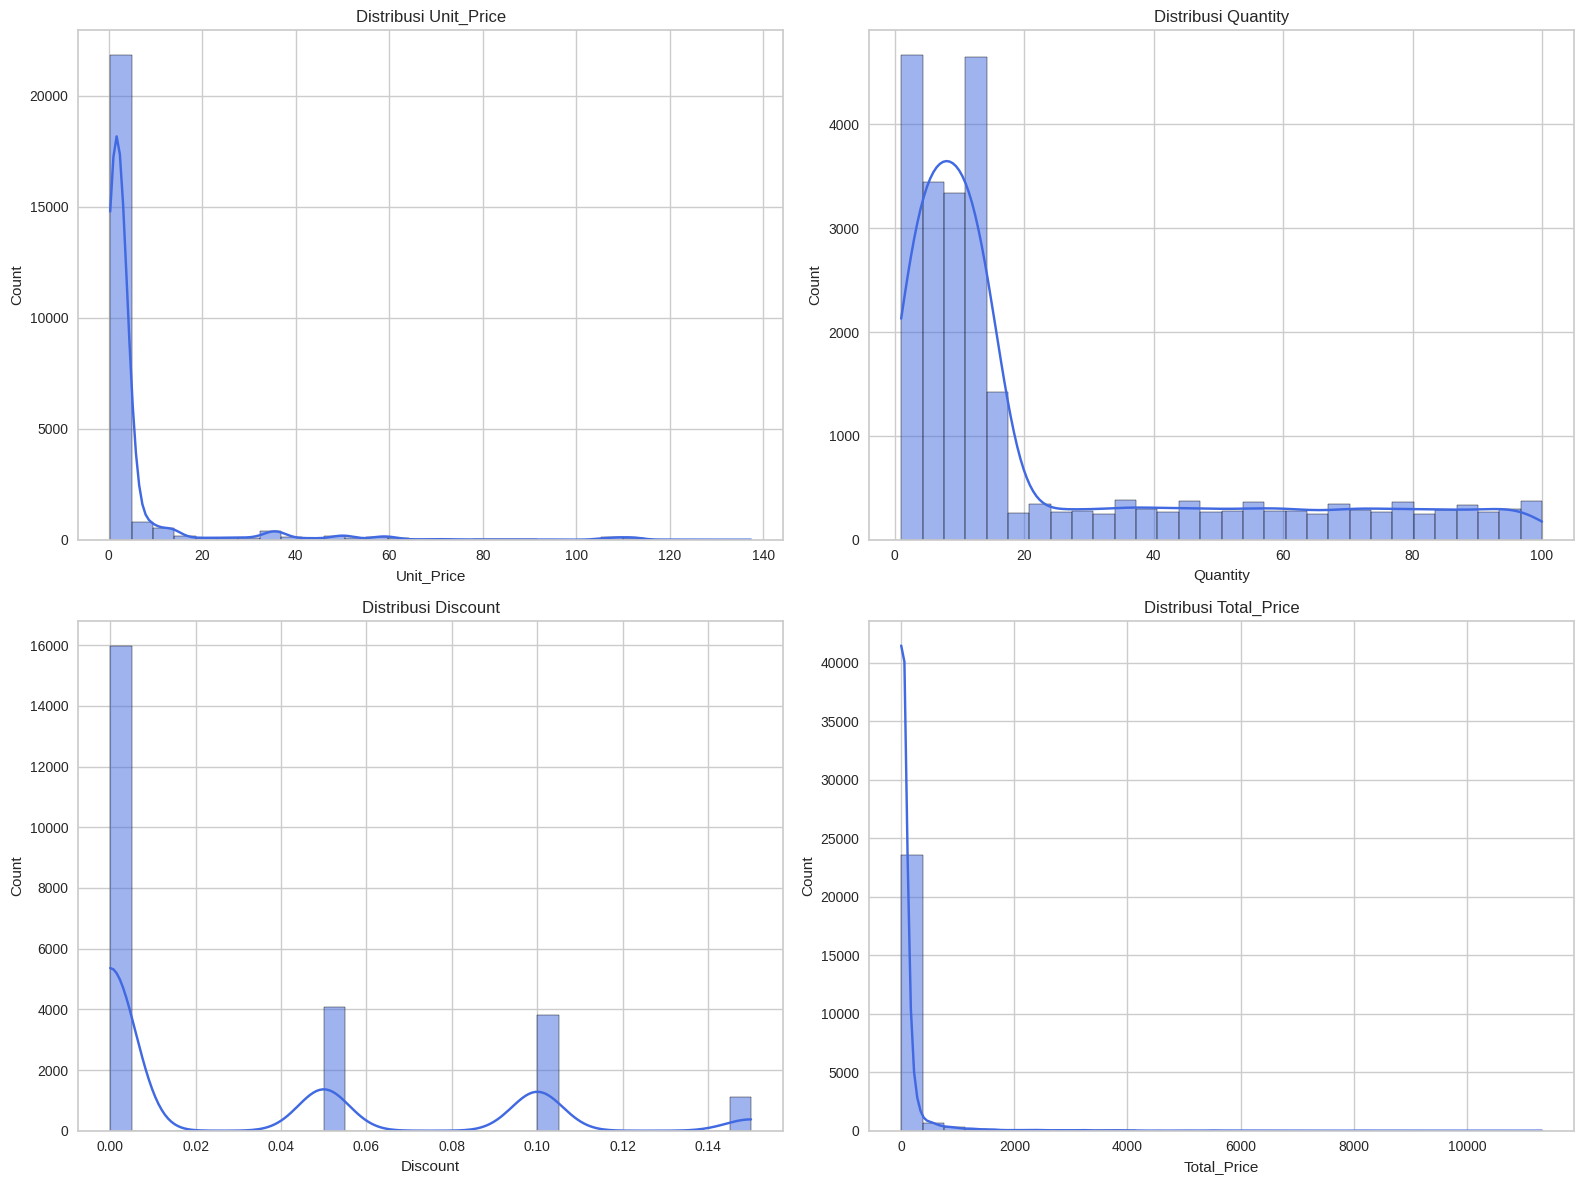

In [ ]:
# Menampilkan distribusi fitur numerikal
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 12))

for i, column in enumerate(num_features, 1):
  plt.subplot(2, 2, i)
  sns.histplot(df[column], bins=30, kde=True, color='royalblue')
  plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Insight:
- Sebagian besar produk beverage yang terjual memiliki harga per unit yang relatif murah, sedangkan produk dengan harga tinggi lebih jarang.
- Mayoritas pelanggan melakukan pembelian dalam jumlah kecil, sementara pembelian dalam jumlah besar (bulk order) terjadi jarang.
- Sebagian besar transaksi tidak mendapatkan diskon (0.00), sedangkan sebagian kecil mendapatkan diskon pada tingkat 0.05, 0.10, dan 0.15. Pola ini menunjukkan bahwa program diskon masih terbatas hanya untuk pelanggan B2B dengan kondisi tertentu.
- Sebagian besar transaksi memiliki nilai total yang relatif kecil dalam periode 2021-2023. Namun, transaksi dengan nilai besar tetap signifikan dan dapat berdampak besar pada pendapatan bisnis meskipun jarang terjadi.

**Menganalisis Korelasi Antar Variabel Numerik**

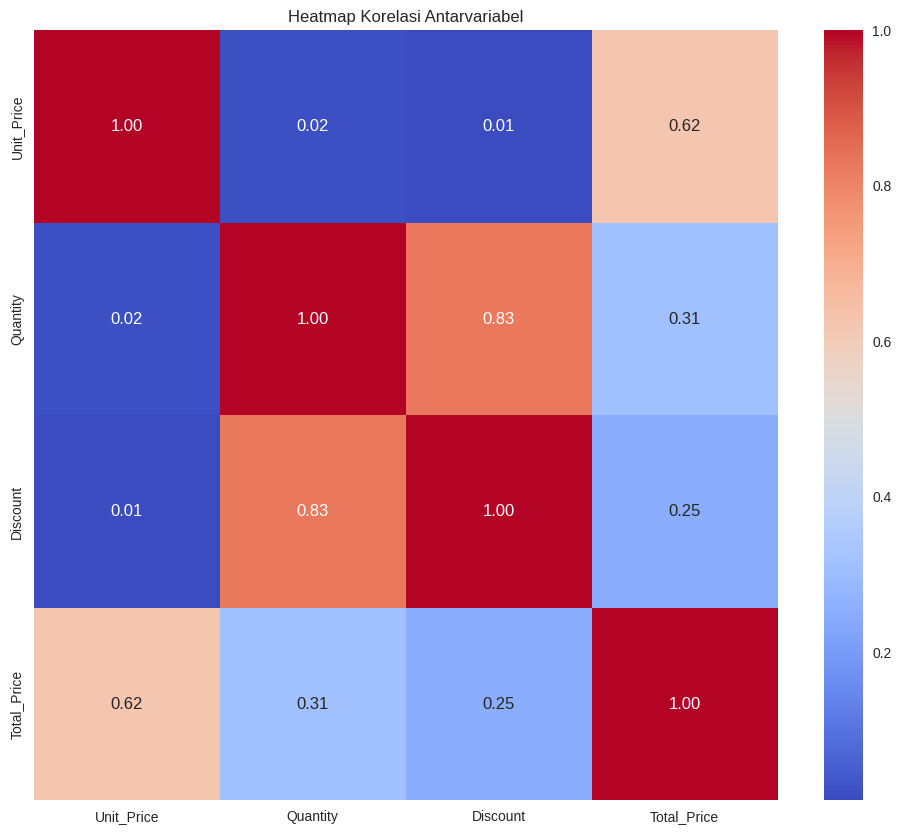

In [ ]:
# Menampilkan heatmap korelasi antarvariabel
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antarvariabel')
plt.show()

Insight:
- **Total_Price** dan **Unit_Price** memiliki korelasi positif sedang (0.62), menunjukkan bahwa semakin tinggi harga per unit, semakin besar total akhir transaksi. Namun faktor lain, seperti jumlah pembelian, juga memengaruhi.
- **Discount** dan **Unit_Price** memiliki korelasi positif yang sangat lemah (0.01), menunjukkan bahwa  perubahan pada Unit_Price hampir tidak berpengaruh terhadap Discount yang diberikan.
- **Quantity** dan **Unit_Price** memiliki korelasi positif yang sangat lemah (0.02), menunjukkan bahwa perubahan pada Unit_Price hampir tidak berpengaruh terhadap jumlah Quantity yang dibeli.
- **Quantity** dan **Total_Price** memiliki korelasi positif yang lemah (0.31), menunjukkan bahwa jumlah produk yang dibeli sedikit berpengaruh terhadap total harga transaksi.
- **Quantity** dan **Discount** memiliki korelasi positif yang kuat (0.83), menujukkan bahwa semakin besar jumlah produk yang dibeli, semakin besar kemungkinan mendapatkan diskon yang lebih tinggi.
- **Discount** dan **Total_Price** memiliki korelasi positif lemah (0.25), menujukkan bahwa transaksi dengan diskon cenderung memiliki nilai total yang lebih tinggi.

**Menganalisis Distribusi Variabel Kategorikal**

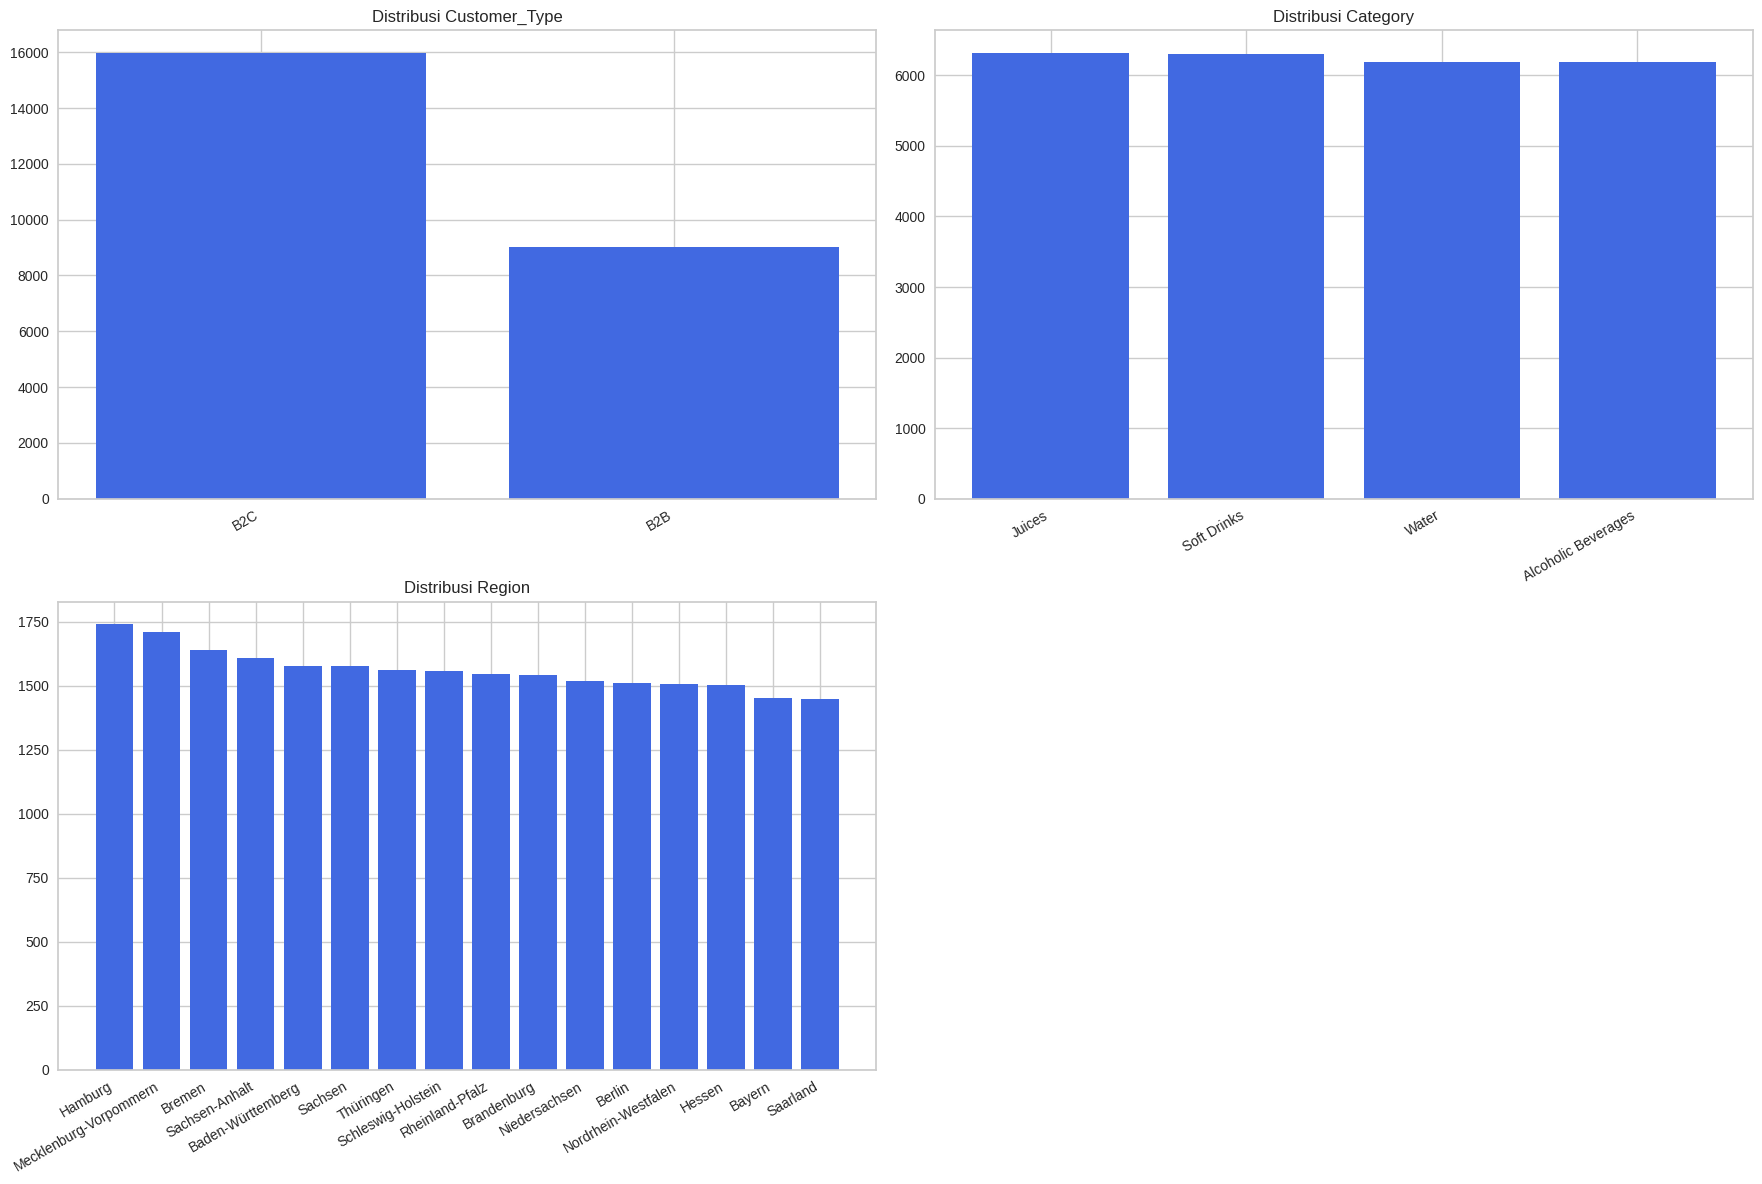

In [ ]:
# Menampilkan bar chart untuk distribusi fitur kategorikal

cat_features = ['Customer_Type', 'Category', 'Region']

plt.figure(figsize=(18, 12))
for i, column in enumerate(cat_features, 1):
  plt.subplot(2, 2, i)
  bars = plt.bar(df[column].value_counts().index, df[column].value_counts().values, color='royalblue')
  plt.title(f'Distribusi {column}')
  plt.xticks(ticks=range(len(bars)), labels=df[column].value_counts().index, rotation=30, ha='right')
plt.tight_layout()
plt.show()

Insight:
- Pelanggan B2B mendominasi dengan 66.1% dari total pelanggan (3,306 bisnis), sedangkan B2C hanya mencakup 33.9% (1,694 individu). Hal ini menunjukkan bahwa mayoritas transaksi berasal dari pelanggan bisnis dibandingkan pelanggan individu.
- Produk terbagi dalam empat kategori utama: Soft Drinks, Juices, Alcoholic Beverages, dan Water. Penjualan di setiap kategori relatif seimbang, dengan Soft Drinks sebagai kategori terlaris (1,318 transaksi).
- Berdasarkan wilayah (Region), Hamburg mencatatkan penjualan tertinggi, sementara Saarland memiliki penjualan terendah

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Memeriksa Data Duplikat**

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Mendeteksi dan Menangani Outliers**



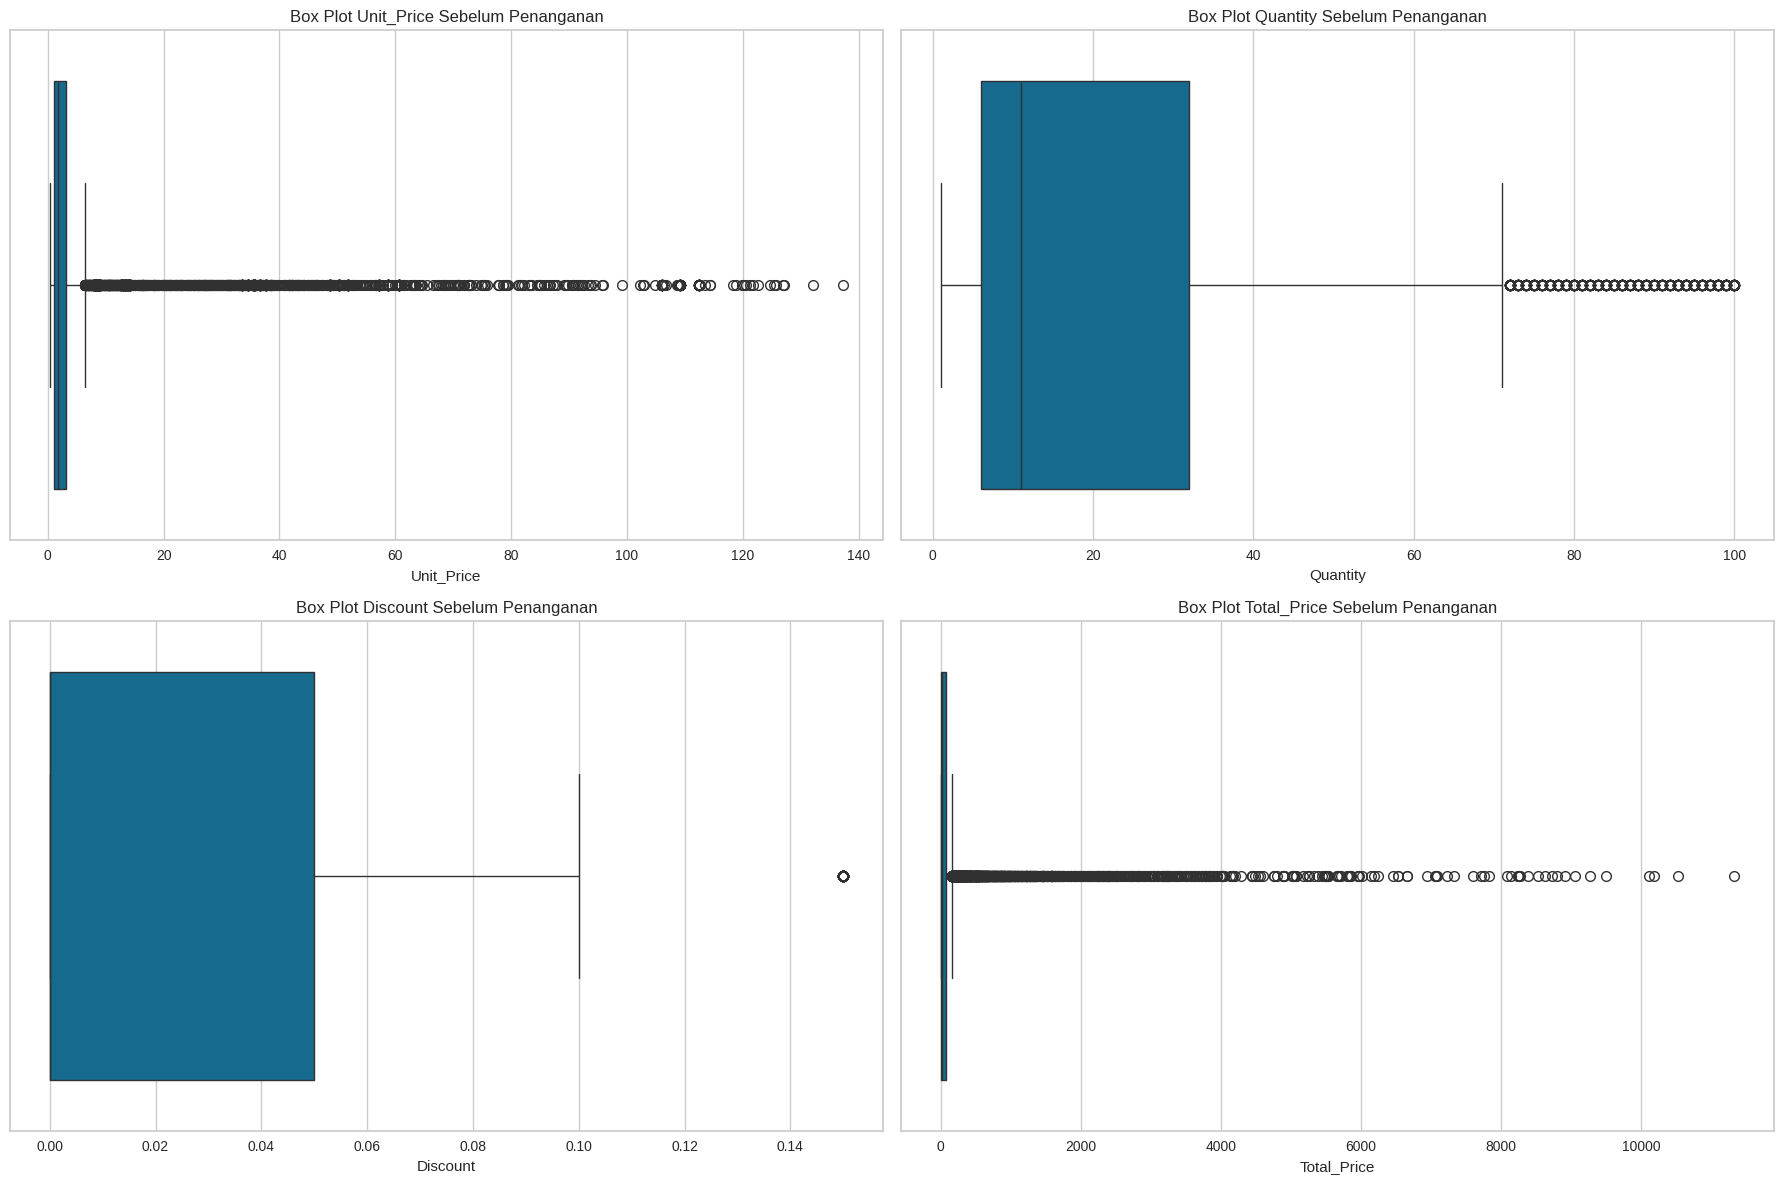

In [ ]:
num_features = df.select_dtypes(include=[np.number]).columns

# Box Plot sebelum penanganan outliers
plt.figure(figsize=(18, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot {feature} Sebelum Penanganan')
plt.tight_layout()
plt.show()

**Unit_Price** dan **Total_Price** memiliki sebaran yang luas dengan banyaknya outlier di nilai yang tinggi, yang menunjukkan adanya beberapa transaksi dengan harga satuan dan total transaksi yang jumlahnya lebih besar dari kebanyakan transaksi. **Quantity** juga terlihat memiliki beberapa outlier, sementara Discount menunjukkan sedikit outlier.

In [ ]:
# Mengganti outlier dengan nilai batas terdekat
for feature in num_features:
   Q1 = df[feature].quantile(0.25)
   Q3 = df[feature].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR

   df[feature] = df[feature].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


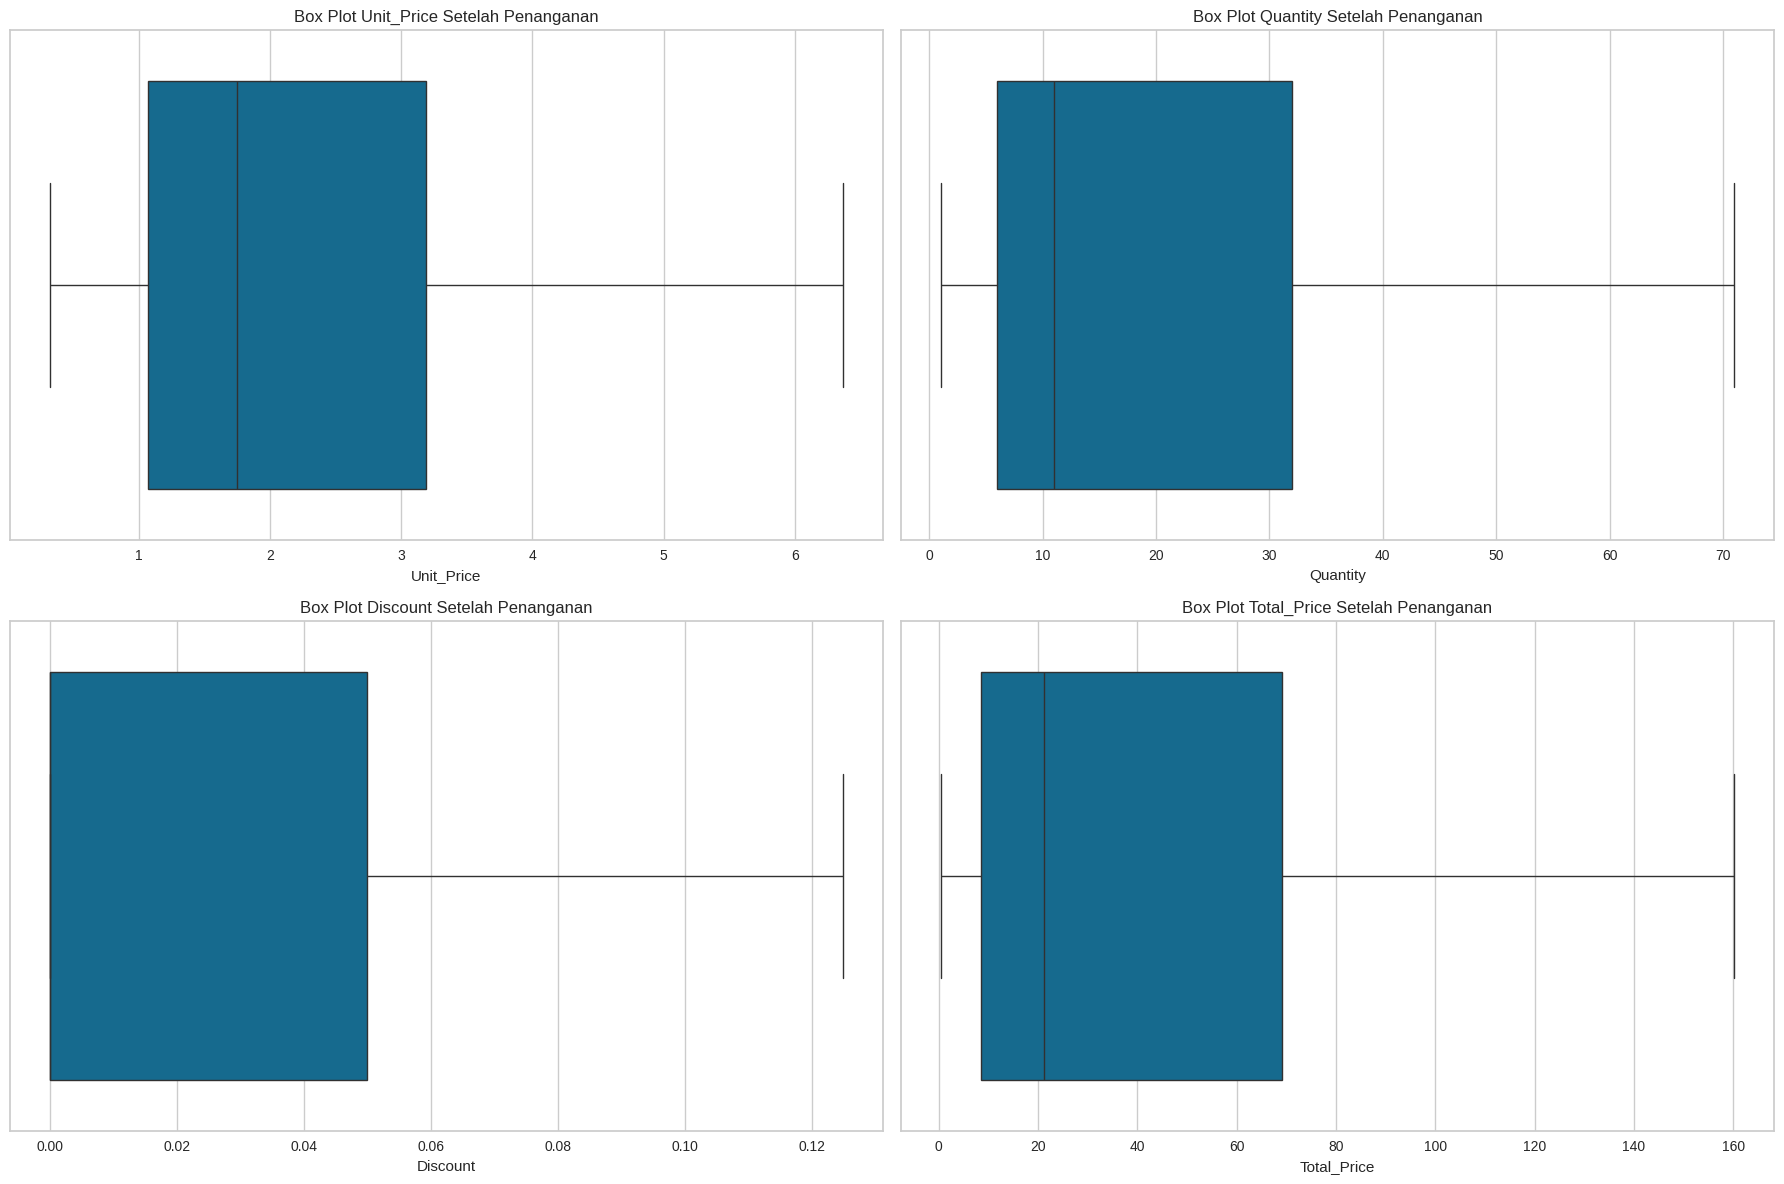

In [ ]:
# Box Plot setelah penanganan outliers
plt.figure(figsize=(18, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot {feature} Setelah Penanganan')
plt.tight_layout()
plt.show()

Setelah penanganan outliers, dataset kini lebih bersih dan sesuai dengan rentang yang telah ditentukan.

**Normalisasi Fitur Numerik**

In [ ]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53.0,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,71.0,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,71.0,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59.0,0.10,160.24,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35.0,0.10,27.40,Baden-Württemberg,2023-08-23


In [ ]:
# instance MinMaxScaler
scaler = MinMaxScaler()
# Normalisasi semua kolom numerik
df[num_features] = scaler.fit_transform(df[num_features])

# Cek bentuk array
print(df[num_features].shape)

(25000, 4)


In [ ]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,0.221488,0.742857,0.8,0.492931,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,0.204959,1.000000,0.8,0.788065,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,0.140496,1.000000,0.4,0.505192,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,0.479339,0.828571,0.8,1.000000,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.090909,0.485714,0.8,0.169023,Baden-Württemberg,2023-08-23


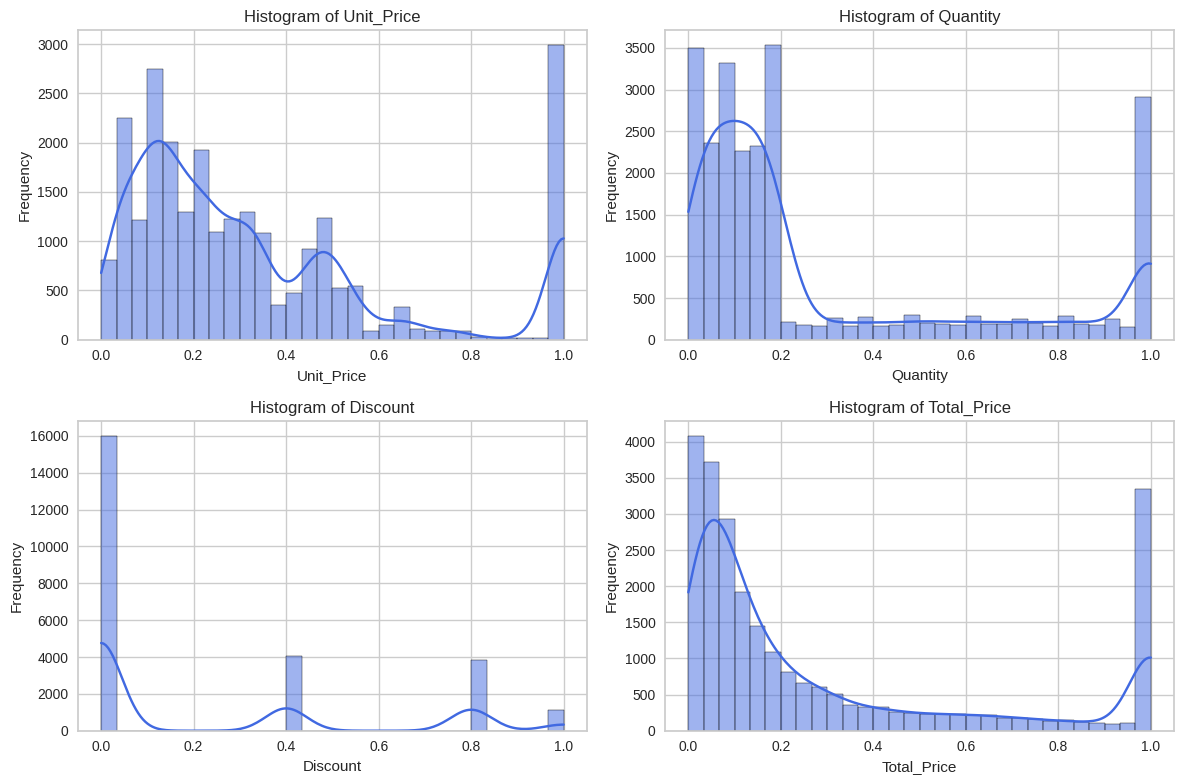

In [ ]:
# Plot histogram
plt.figure(figsize=(12, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=30, kde=True, color='royalblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Insight:
- Distribusi Unit_Price setelah normalisasi menjadi lebih merata di beberapa bagian, yang menunjukkan keberagaman harga per unit dengan mayoritas nilai berada di rentang bawah.
- Distribusi Quantity setelah normalisasi menunjukkan banyaknya transaksi dalam jumlah kecil dan ada produk yang dibeli dalam jumlah besar.
- Distribusi Discount setelah normalisasi menunjukkan bahwa sebagian besar transaksi tidak memiliki diskon.
- Distribusi Total_Price menunjukkan bahwa sebagian besar transaksi memiliki nilai total yang relatif rendah.

**Encoding Fitur Kategori**

In [ ]:
# One Hot Encoding untuk fitur Customer Type
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Customer_Type']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Customer_Type']))

df = pd.concat([df.drop(['Customer_Type'], axis=1), encoded_df], axis=1)

In [ ]:
df.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD1,CUS1496,Vio Wasser,Water,0.221488,0.742857,0.8,0.492931,Baden-Württemberg,2023-08-23,1.0,0.0
1,ORD1,CUS1496,Evian,Water,0.204959,1.000000,0.8,0.788065,Baden-Württemberg,2023-08-23,1.0,0.0
2,ORD1,CUS1496,Sprite,Soft Drinks,0.140496,1.000000,0.4,0.505192,Baden-Württemberg,2023-08-23,1.0,0.0
3,ORD1,CUS1496,Rauch Multivitamin,Juices,0.479339,0.828571,0.8,1.000000,Baden-Württemberg,2023-08-23,1.0,0.0
4,ORD1,CUS1496,Gerolsteiner,Water,0.090909,0.485714,0.8,0.169023,Baden-Württemberg,2023-08-23,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order_ID           25000 non-null  object        
 1   Customer_ID        25000 non-null  object        
 2   Product            25000 non-null  object        
 3   Category           25000 non-null  object        
 4   Unit_Price         25000 non-null  float64       
 5   Quantity           25000 non-null  float64       
 6   Discount           25000 non-null  float64       
 7   Total_Price        25000 non-null  float64       
 8   Region             25000 non-null  object        
 9   Order_Date         25000 non-null  datetime64[ns]
 10  Customer_Type_B2B  25000 non-null  float64       
 11  Customer_Type_B2C  25000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 2.3+ MB


Insight: Setelah menerapkan One Hot Encoding pada kolom Customer_Type, kolom asli tersebut dihapus dan digantikan oleh dua kolom baru: Customer_Type_B2B dan Customer_Type_B2C. Dengan transformasi ini, dataset kini memiliki total 25.000 baris dan 12 kolom.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Memilih fitur
selected_features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Customer_Type_B2B', 'Customer_Type_B2C']
X = df[selected_features].values

# Membangun model K-Means++ dengan jumlah klaster awal (misalnya 4)
k  = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X) # Menyimpan hasil clustering

# Membuat dataframe baru untuk hasil clustering
df['Cluster'] = labels

# Melihat Silhouette Score untuk model awal
silhouette_scores = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_scores)

# Melihat hasil clustering
print(f"Distribusi Cluster:\n{df['Cluster'].value_counts().sort_index()}")

Silhouette Score: 0.612415830287702
Distribusi Cluster:
Cluster
0     1984
1     4498
2    14005
3     4513
Name: count, dtype: int64


Insight:
- Hasil pembangunan model awal menggunakan algoritma K-Means++ dengan jumlah klaster 4 menghasilkan Silhouette Score sebesar 0.6124. Nilai ini menunjukkan bahwa klaster yang terbentuk memiliki kualitas yang cukup baik. Namun, masih terdapat peluang untuk meningkatkan kualitas klaster guna mencapai hasil yang lebih optimal

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

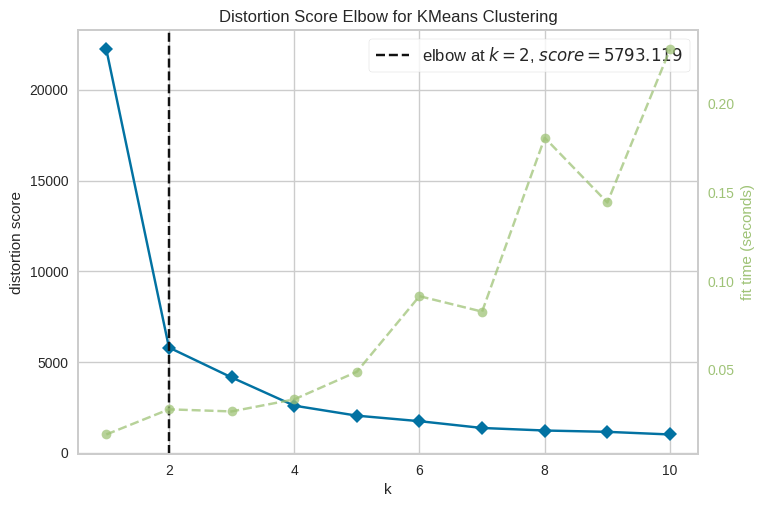

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metode Elbow untuk menentukan k optimal
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 11))
visualizer.fit(X)
visualizer.show()

Silhouette Score untuk 2 cluster: 0.7015
Silhouette Score untuk 3 cluster: 0.6364
Silhouette Score untuk 4 cluster: 0.6124
Silhouette Score untuk 5 cluster: 0.5987
Silhouette Score untuk 6 cluster: 0.5068
Silhouette Score untuk 7 cluster: 0.5072
Silhouette Score untuk 8 cluster: 0.5062
Silhouette Score untuk 9 cluster: 0.5091
Silhouette Score untuk 10 cluster: 0.4635


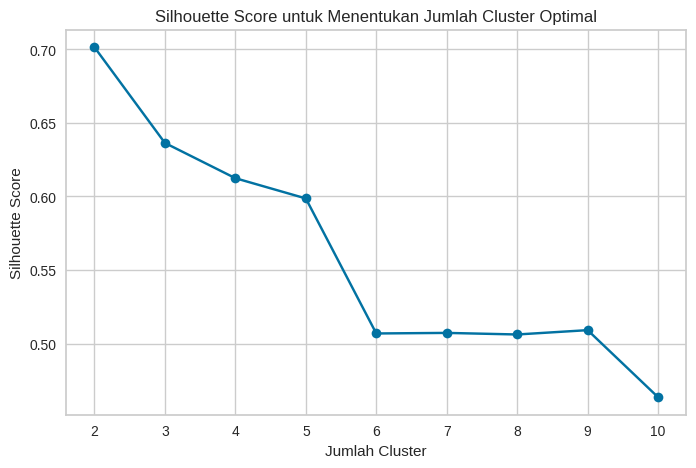

In [ ]:
# Menghitung Silhouette Score untuk setiap jumlah cluster dari 2 hingga 10
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk {k} cluster: {score:.4f}")

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan Jumlah Cluster Optimal")
plt.show()

Insight:
- Berdasarkan metode Elbow, jumlah cluster optimal adalah 2 dengan nilai total within-cluster sum of squares (WCSS) sebesar 5793.119. Ini mengindikasikan bahwa membagi data menjadi 2 cluster akan memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.
- Berdasarkan perhitungan Silhouette Score, jumlah cluster yang optimal adalah 2, dengan skor sebesar 0.7015. Hasil ini sama dengan metode Elbow, yang juga menunjukkan bahwa jumlah cluster optimal adalah 2. Dengan demikian, kedua metode tersebut mengonfirmasi bahwa 2 cluster merupakan pilihan terbaik untuk segmentasi data ini.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Clustering Sebelum Feature Selection
# Menentukan jumlah cluster optimal menggunakan metode elbow
k_optimal = visualizer.elbow_value_

# Clustering awal dengan K-Means
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
labels_initial = kmeans.fit_predict(X)  # Menyimpan hasil clustering

# Evaluasi dengan Silhouette Score
silhouette_initial = silhouette_score(X, labels_initial)
print(f'Silhouette Score Sebelum Feature Selection: {silhouette_initial:.4f}')

Silhouette Score Sebelum Feature Selection: 0.7015


In [ ]:
# Mengubah X menjadi bentuk DataFrame
X_df = pd.DataFrame(X, columns=['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Customer_Type_B2B', 'Customer_Type_B2C'])

# 1.Drop Incomplete Features (Jika missing values >50%, kolomnya dihapus)
missing_threshold = 0.5
df_cleaned = X_df.dropna(thresh=missing_threshold * len(X_df), axis=1)

# 2. Drop Features with (Near-)Zero Variance (Variance Minimum)
var_threshold = 0.01
var_selector = VarianceThreshold(threshold=var_threshold)
df_var_selected = df_cleaned.iloc[:, var_selector.fit(df_cleaned).get_support()]

# 3. Drop Features with High Multicollinearity
X = df_var_selected.select_dtypes(include=[np.number])
vif_data = pd.DataFrame() # Buat DF kosong
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Menghitung HIF
vif_threshold = 5 # Ambang batas VIF
high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['Feature'].tolist()
df_vif_selected = df_var_selected.drop(columns=high_vif_features, errors='ignore')

# 4. Correlation-based Selection
correlation_threshold = 0.85
corr_matrix = df_vif_selected.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
df_corr_selected = df_vif_selected.drop(columns=to_drop)

# Clustering dengan K-Means pada Fitur Terpilih
kmeans_selected = KMeans(n_clusters=k_optimal, random_state=42)
labels_selected = kmeans_selected.fit_predict(df_corr_selected)

# Evaluasi ulang dengan Silhouette Score
silhouette_selected = silhouette_score(df_corr_selected, labels_selected)
print(f'Silhouette Score Setelah Feature Selection: {silhouette_selected:.4f}')

Silhouette Score Setelah Feature Selection: 0.7193


Insight:

Setelah dilakukan Feature Selection yang mencakup beberapa pendekatan, Silhouette Score meningkat dari 0.7015 menjadi 0.7193. Meskipun tidak banyak, peningkatan ini dapat menunjukkan bahwa clustering menjadi lebih optimal, dengan pemisahan antar cluster yang lebih jelas dan objek dalam cluster lebih seragam setelah fitur yang kurang relevan dihapus.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

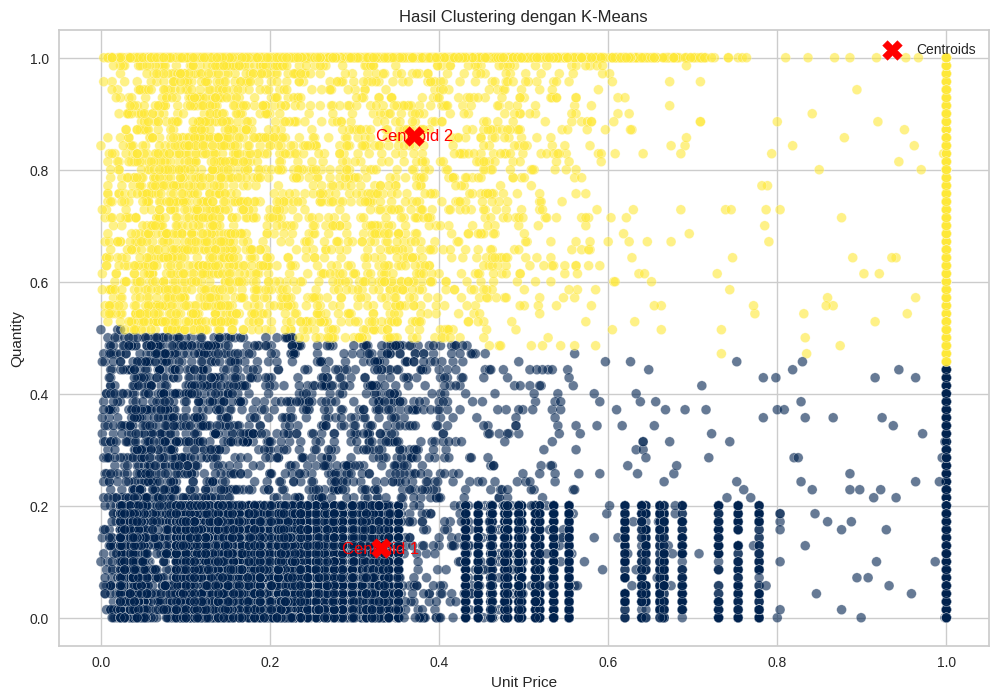

Nilai Centroids:
Centroid 1: Unit Price = 0.33, Quantity = 0.12
Centroid 2: Unit Price = 0.37, Quantity = 0.86


In [ ]:
# Memilih fitur
selected_features = ['Unit_Price', 'Quantity']
X = df[selected_features]

# Standarisasi data
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)


# Ambil posisi centroid
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))

# Plot Data
plt.scatter(
    df['Unit_Price'],
    df['Quantity'],
    c=labels,  # Warna berdasarkan cluster
    cmap='cividis',
    s=50,
    alpha=0.6,
    edgecolors='w',
    marker='o'
)

# Inverse transform centroid
centroids_original = std_scaler.inverse_transform(centroids)

# Plot centroid
plt.scatter(
    centroids_original[:, 0],
    centroids_original[:, 1],
    marker='X',
    s=200,
    color='red',
    label='Centroids'
)

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids_original):
    plt.text(
        centroid[0], centroid[1],
        f'Centroid {i+1}',
        color='red', fontsize=12, ha='center', va='center'
    )

# Menambahkan judul dan label
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Hasil Clustering dengan K-Means')
plt.legend(loc='upper right')
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids_original):
    print(f"Centroid {i+1}: Unit Price = {centroid[0]:.2f}, Quantity = {centroid[1]:.2f}")

Insight:
- Cluster 1 memiliki harga satuan yang rendah (0.33) dan jumlah pembelian yang kecil (0.12), mengindikasikan bahwa pelanggan dari cluster ini membeli barang dengan harga relatif mudah dan dalam jumlah yang kecil.
- Cluster 2 memiliki harga satuan yang sedikit lebih tinggi (0.37) dan jumlah pembelian yang besar (0.86), mengindikasikan bahwa pelanggan dari cluster ini cenderung membeli dalam jumlah besar dengan harga satuan yang sedikit lebih tinggi.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Menyimpan hasil clustering dari tahapan Feature Selection
df['Cluster'] = labels_selected
df.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C,Cluster
0,ORD1,CUS1496,Vio Wasser,Water,0.221488,0.742857,0.8,0.492931,Baden-Württemberg,2023-08-23,1.0,0.0,1
1,ORD1,CUS1496,Evian,Water,0.204959,1.000000,0.8,0.788065,Baden-Württemberg,2023-08-23,1.0,0.0,1
2,ORD1,CUS1496,Sprite,Soft Drinks,0.140496,1.000000,0.4,0.505192,Baden-Württemberg,2023-08-23,1.0,0.0,1
3,ORD1,CUS1496,Rauch Multivitamin,Juices,0.479339,0.828571,0.8,1.000000,Baden-Württemberg,2023-08-23,1.0,0.0,1
4,ORD1,CUS1496,Gerolsteiner,Water,0.090909,0.485714,0.8,0.169023,Baden-Württemberg,2023-08-23,1.0,0.0,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Melakukan inverse transform untuk semua fitur numerik
df[num_features] = scaler.inverse_transform(df[num_features])

df.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C,Cluster
0,ORD1,CUS1496,Vio Wasser,Water,1.66,53.0,0.10,79.18,Baden-Württemberg,2023-08-23,1.0,0.0,1
1,ORD1,CUS1496,Evian,Water,1.56,71.0,0.10,126.36,Baden-Württemberg,2023-08-23,1.0,0.0,1
2,ORD1,CUS1496,Sprite,Soft Drinks,1.17,71.0,0.05,81.14,Baden-Württemberg,2023-08-23,1.0,0.0,1
3,ORD1,CUS1496,Rauch Multivitamin,Juices,3.22,59.0,0.10,160.24,Baden-Württemberg,2023-08-23,1.0,0.0,1
4,ORD1,CUS1496,Gerolsteiner,Water,0.87,35.0,0.10,27.40,Baden-Württemberg,2023-08-23,1.0,0.0,1


In [ ]:
# Melakukan inverse transform untuk One Hot Encoding
decoded_data = encoder.inverse_transform(encoded_data)

decoded_df = pd.DataFrame(decoded_data, columns=['Customer_Type'])

df = pd.concat([df.drop(encoded_df, axis=1), decoded_df], axis=1)

In [ ]:
df.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster,Customer_Type
0,ORD1,CUS1496,Vio Wasser,Water,1.66,53.0,0.10,79.18,Baden-Württemberg,2023-08-23,1,B2B
1,ORD1,CUS1496,Evian,Water,1.56,71.0,0.10,126.36,Baden-Württemberg,2023-08-23,1,B2B
2,ORD1,CUS1496,Sprite,Soft Drinks,1.17,71.0,0.05,81.14,Baden-Württemberg,2023-08-23,1,B2B
3,ORD1,CUS1496,Rauch Multivitamin,Juices,3.22,59.0,0.10,160.24,Baden-Württemberg,2023-08-23,1,B2B
4,ORD1,CUS1496,Gerolsteiner,Water,0.87,35.0,0.10,27.40,Baden-Württemberg,2023-08-23,1,B2B


In [ ]:
# Fungsi untuk analisis karakteristik cluster
X = df[num_features].values

def analyze_clusters(X, labels, k_optimal):
  print("Analisis Karakteristik Setiap Cluster:")

  for cluster_id in range(k_optimal):
    # Ambil data yang termasuk dalam cluster tertentu
    cluster_data = X[labels == cluster_id]

    print(f"\nCluster {cluster_id + 1}:")
    for i, feature in enumerate(num_features):
      min_val = cluster_data[:, i].min()
      max_val = cluster_data[:, i].max()
      mean_val = cluster_data[:, i].mean()
      print(f" - {feature}: min = {min_val:.2f}, max = {max_val:.2f}, mean = {mean_val:.2f}")

# Pastikan labels dalam format array numpy
labels = np.array(df['Cluster'])

# Jalankan analisis cluster
analyze_clusters(X, labels, k_optimal)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
 - Unit_Price: min = 0.46, max = 6.37, mean = 2.36
 - Quantity: min = 1.00, max = 15.00, mean = 8.02
 - Discount: min = 0.00, max = 0.00, mean = 0.00
 - Total_Price: min = 0.46, max = 160.24, mean = 26.31

Cluster 2:
 - Unit_Price: min = 0.32, max = 6.37, mean = 2.42
 - Quantity: min = 1.00, max = 71.00, mean = 46.22
 - Discount: min = 0.05, max = 0.12, mean = 0.08
 - Total_Price: min = 0.38, max = 160.24, mean = 85.89


Tulis hasil interpretasinya di sini.
1. Cluster 1:
  * **Rentang Unit Price**: 0.46 - 6.37 dengan **Rata-Rata**: 2.36.
  * **Rentang Quantity**: 1 - 15 dengan **Rata-Rata**: 8.02.
  * Semua transaksi memiliki diskon **0%**
  * **Rentang Total Price**: 0.46 - 160.24 dengan **Rata-Rata**: 6.31.
  * **Analisis**: Cluster ini mencakup pelanggan yang melakukan pembelian dalam jumlah kecil tanpa memanfaatkan diskon. Dengan rata-rata total transaksi yang relatif rendah, pelanggan dalam cluster ini kemungkinan besar adalah individu atau merupakan bagian dari transaksi B2C. Hal ini dapat menunjukkan bahwa mereka cenderung berbelanja sesuai kebutuhan tanpa aktif mencari diskon atau penawaran khusus.
2. Cluster 2:
  * **Rentang Unit Price**: 0.32 - 6.37 dengan **Rata-Rata**: 2.42.
  * **Rentang Quantity**: 1 - 71 dengan **Rata-Rata**: 46.22.
  * **Rentang Diskon**: 0.05 - 0.12 dengan **Rata-Rata**: 0.8.
  * **Rentang Total Price**: 0.38 - 160.24 dengan **Rata-Rata**: 85.89.
  * **Analisis**: Cluster ini mencakup pelanggan yang melakukan pembelian dalam jumlah besar dengan memanfaatkan diskon kecil. Dengan rata-rata total transaksi yang relatif besar, pelanggan dalam cluster ini kemungkinan besar berasal dari transaksi B2B. Hal ini menunjukkan bahwa mereka cenderung berbelanja secara strategis dengan berfokus pada jumlah besar untuk memenuhi kebutuhan bisnis mereka.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Menyimpan hasil clustering ke dalam file CSV
df.to_csv('data_clustering.csv', index=False)